<center><img style ="float: center;" src="https://www.quantiphi.com/wp-content/uploads/2017/06/insurance-customer-churn-analytics.jpg" width="400" height="360"/><center>

***

<strong><h3 align="right" style='color:Orange'>LINEAR REGRESSION</h3><strong>

## TABLE OF CONTENTS
1. [Loading data and libraries](#Section1)<br><br>
2. [About the data set and objectives](#Section2)<br><br>
3. [EDA on data-set](#Section3)<br>
4. [Creating Models - Objective Minimise F1 score](#Section4)<br>
    4.1 [Initial Model Building & Algo Selection](#Section401)<br><br>
5. [Applying Strategies to Improve Scores](#Section5)<br>
    5.1 [Applying Standard Scaler](#Section501)<br>
    5.2 [Applying Robust Scaler](#Section402)<br>
    5.3 [Applying Normaliser](#Section403)<br><br>
6. [Establishing importance of features for optimisation](#Section6)<br>
    6.1 [Applying PCA](#Section601)<br>
    6.2 [Applying manual method](#Section602)<br><br>

7. [Performing cross validation hyper-parameter tuning](#Section7)<br><br>
8. [Model Evaluation](#Section8)<br>
    8.1 [Building the confusion matrix](#Section801)<br>
    8.2 [AUC ROC Curve](#Section802)<br><br>
9. [Fun with Auto ML](#Section9)<br>
    9.1 [Applying Pycaret](#Section901)<br>
    9.2 [Applying Tpot](#Section902)<br><br>
10. [Conclusion and closing remarks](#Section10)<br>
    
____


## 1. Loading data and libraries <a class="anchor" id="Section1"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('max_columns',200)
pd.set_option('max_rows', 200)

insurance = pd.read_csv('train.csv')
import warnings
warnings.filterwarnings('ignore')

print('Setup done!')

Setup done!


In [2]:
insurance.shape

(33908, 17)

In [3]:
insurance.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


## 2. About the data set and objectives <a class="anchor" id="Section2"></a>

The data has been downloaded from https://www.kaggle.com/k123vinod/insurance-churn-prediction-weekend-hackathon

Context
Insurance companies around the world operate in a very competitive environment. With various aspects of data collected from millions of customers, it is painstakingly hard to analyze and understand the reason for a customer’s decision to switch to a different insurance provider.

For an industry where customer acquisition and retention are equally important, and the former being a more expensive process, insurance companies rely on data to understand customer behavior to prevent retention. Thus knowing whether a customer is possibly going to switch beforehand gives Insurance companies an opportunity to come up with strategies to prevent it from actually happening.

Content
Given are 16 distinguishing factors that can help in understanding the customer churn, your objective as a data scientist is to build a Machine Learning model that can predict whether the insurance company will lose a customer or not using these factors.

You are provided with 16 anonymized factors (feature_0 to feature 15) that influence the churn of customers in the insurance industry

Acknowledgements
Credit goes to:- https://www.machinehack.com/course/insurance-churn-prediction-weekend-hackathon-2/

Inspiration
Build a Machine Learning model that can predict whether the insurance company will lose a customer or not using these factors.


The dataset has a set of 16 features which result in a binary reesult of 1 or 0 (will churn / will not churn) i.e.

- The data itself is split into train and test.
- Objective as outlined in kaggle is to reduce the F1 score.
- This is a classification problem.
- The definitions of the label 0 or 1 is undefined.

## 3. EDA on data-set <a class="anchor" id="Section3"></a>

In [4]:
#initiating with descriptive statistics of data-set

insurance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
feature_0,33908.0,-0.004158,0.999776,-2.159994,-0.747384,-0.182341,0.665225,5.091402
feature_1,33908.0,0.002584,1.014268,-3.081149,-0.422787,-0.297324,0.022901,33.094776
feature_2,33908.0,-0.000213,1.000872,-1.779108,-0.938003,0.023260,0.624050,1.825628
feature_3,33908.0,-0.000053,1.002512,-1.002478,-0.602517,-0.303517,0.236237,18.094700
feature_4,33908.0,-0.000298,1.003724,-0.569351,-0.569351,-0.246560,0.076230,19.443647
feature_5,33908.0,-0.004652,0.993984,-0.411453,-0.411453,-0.411453,-0.411453,8.127648
feature_6,33908.0,-0.007498,0.802696,-0.251940,-0.251940,-0.251940,-0.251940,23.625644
feature_7,33908.0,4.336381,3.273376,0.000000,1.000000,4.000000,7.000000,11.000000
feature_8,33908.0,1.171051,0.606730,0.000000,1.000000,1.000000,2.000000,2.000000
feature_9,33908.0,1.225345,0.749104,0.000000,1.000000,1.000000,2.000000,3.000000


- It seems from the above that the data-set has no missing values.
- From the labels column it is clear that the dataset is unbalanced with focus towards 0. rather than 1.
- The highest range is from column feature_1.
- Columns representing feature-10 through 12 seem to be binary in nature either a yes or a no.

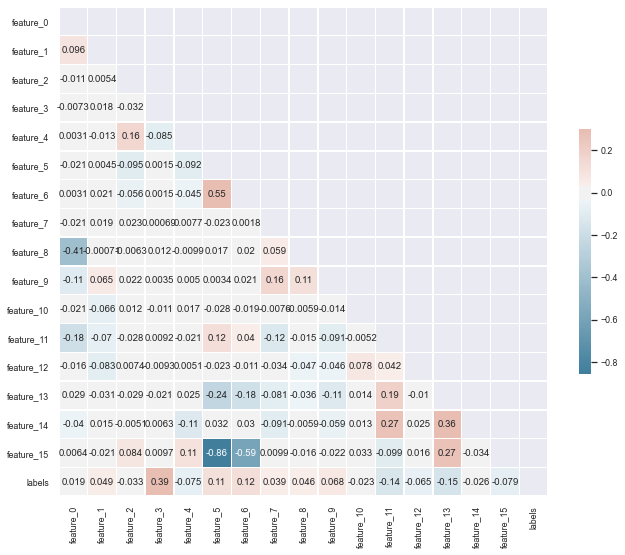

In [5]:
# diagonal correlation plot

sns.set(font_scale = .8)
f,ax = plt.subplots(figsize = (11,9))
corr = insurance.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(230,20, as_cmap = True)
sns.heatmap(corr,mask = mask, cmap = cmap, vmax =.3, center = 0, square = True, linewidth = .5, 
            cbar_kws = {'shrink' :.5}, annot = True);

- The target variable labels has mild correlation with feature_3 & feature_7
- Feature_15 has high negative correlation with feature_5 - -0.85
- Feature_15 and feature_6 also have a negative correlation (though not as high) - -0.59
- Feature_8 has correlation with feature_0 - -0.40
- Feature_13 & feature_14 have positive correlation - 0.36

Interesting to note is that most of the higher correlations are negative in nature except for 1 case - i.e. correlation between feature_13 and feature_14.

In [6]:
insurance.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'labels'],
      dtype='object')

In [7]:
#taking a look at the data-types in the data-set

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33908 entries, 0 to 33907
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   33908 non-null  float64
 1   feature_1   33908 non-null  float64
 2   feature_2   33908 non-null  float64
 3   feature_3   33908 non-null  float64
 4   feature_4   33908 non-null  float64
 5   feature_5   33908 non-null  float64
 6   feature_6   33908 non-null  float64
 7   feature_7   33908 non-null  int64  
 8   feature_8   33908 non-null  int64  
 9   feature_9   33908 non-null  int64  
 10  feature_10  33908 non-null  int64  
 11  feature_11  33908 non-null  int64  
 12  feature_12  33908 non-null  int64  
 13  feature_13  33908 non-null  int64  
 14  feature_14  33908 non-null  int64  
 15  feature_15  33908 non-null  int64  
 16  labels      33908 non-null  int64  
dtypes: float64(7), int64(10)
memory usage: 4.4 MB


There is a near equal split of float and integer columns.  There seems to be no categorical columns in the data-set hence transformation of categorical variables will not be needed.

Also this reinforces the initial obeservation that there are no null data points in the data-set.

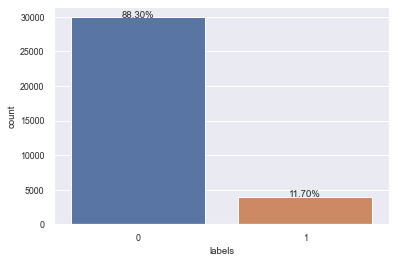

In [8]:
total = len(insurance)
ax=sns.countplot(data = insurance, x='labels');
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,'{:1.2f}%'.format((height/total)*100), ha="center") 

Reinforces the point that the data-set is unbalanced - with just 12% of customers expected to churn

In [9]:
#performing pandas-profiling to understand the data further and draw out key inferences.

from pandas_profiling import ProfileReport

profile = ProfileReport(insurance, title = 'Pandas Profiling Report of Insurance DataFrame')
profile.to_file("Pandas Profiling1.html")

### Observations from Pandas_Profiling
- The data looks clean with no missing cells
- There are two warnings for feature 7 and feature 14 as both have a large share of zeros
    - Firstly they are part of integer columns, and can be ignored on account of encoding categorical data
- The data seems to be normalised on all feature columns
- Possibility of keeping either feature 5 and feature 15 as they have high positive correlation - can be explored while evaluating machine learning


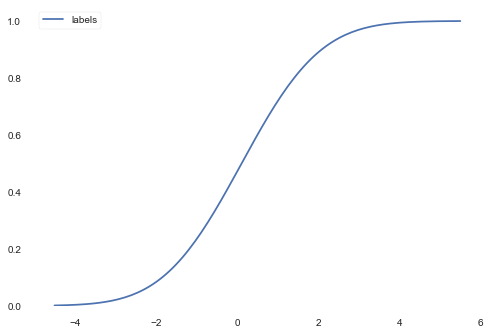

In [10]:
sns.kdeplot(insurance.labels, cumulative=True, bw=1.5)

#clearly there are more 1s than there are 0s.

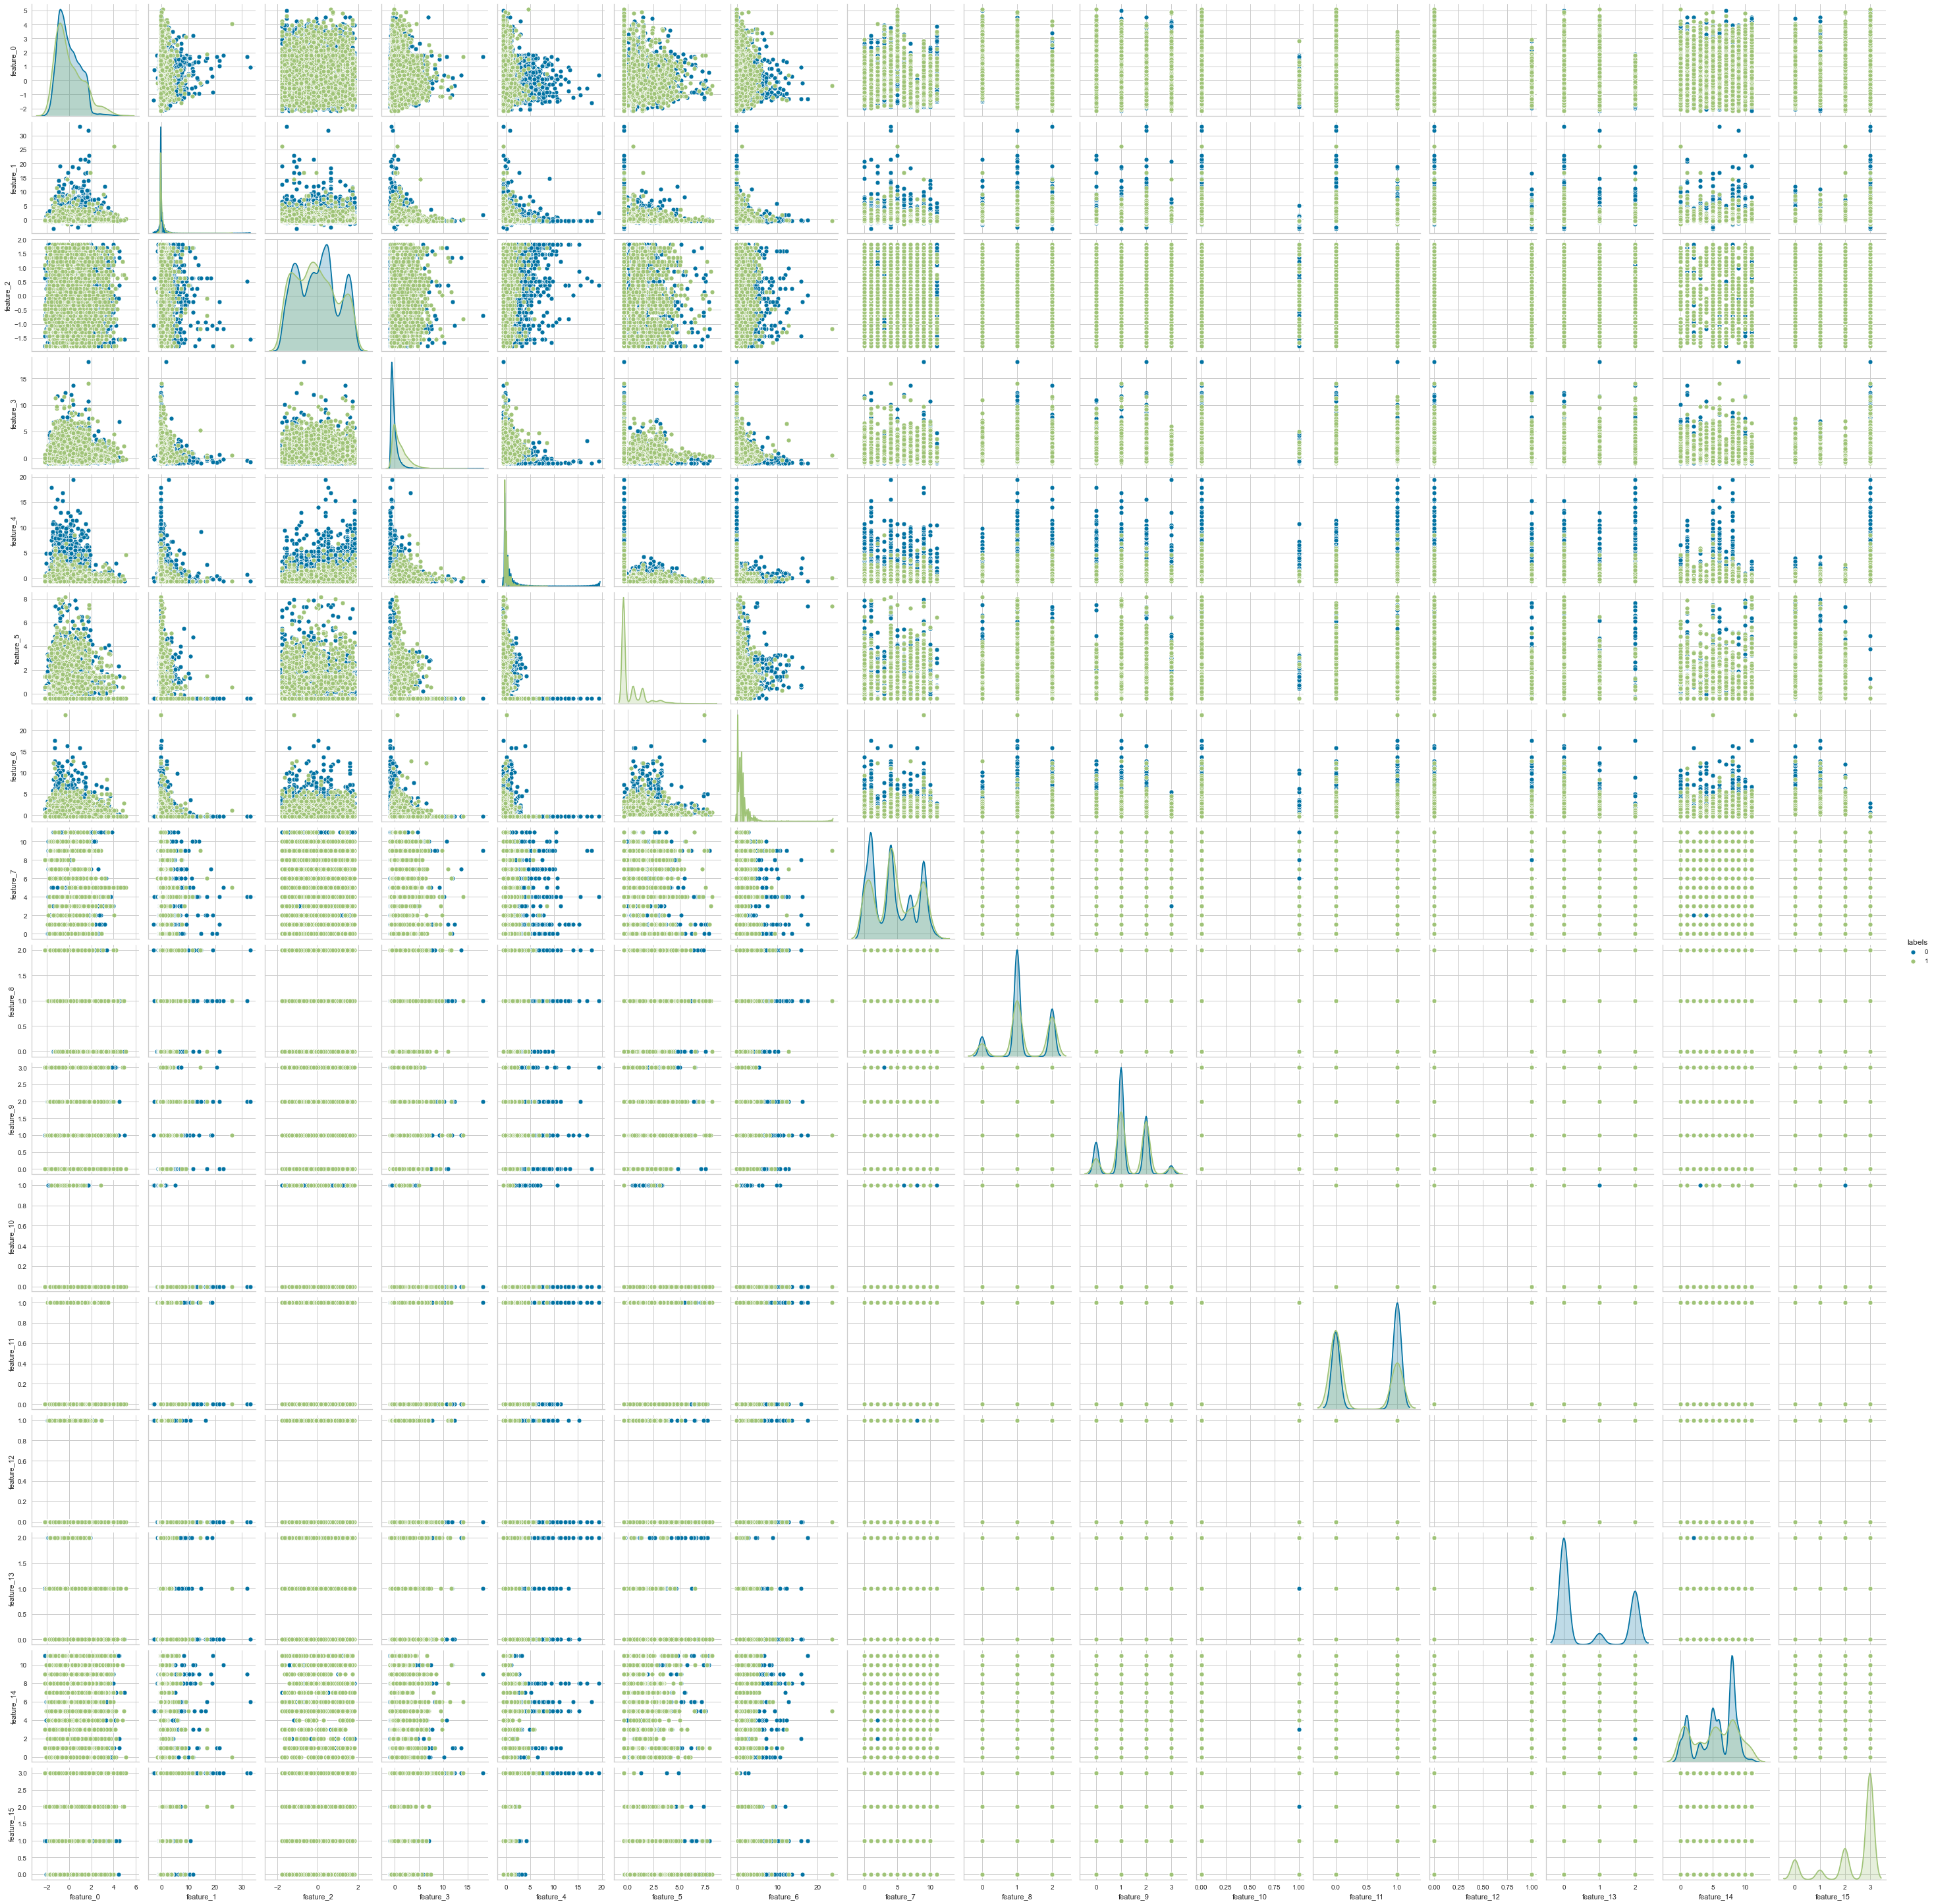

In [62]:
sns.pairplot(insurance, hue = 'labels');

- It is clear from the above that customers who churn, represented in blue i.e 1 are clearly clustered towards specific ends of the data.
- Other than the first 6 features the rest of the columns are all encoded from ordinal data.

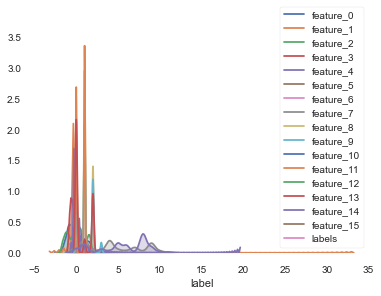

In [46]:
#kde plots of the 16 feature columns

for col in insurance.columns:
    sns.kdeplot(insurance[col], shade = True);
    plt.xlabel('label')

The data points are clustered around +5 to -5, however transformations may be needed on feature_14 which has outliers. Exploring more through box plots.

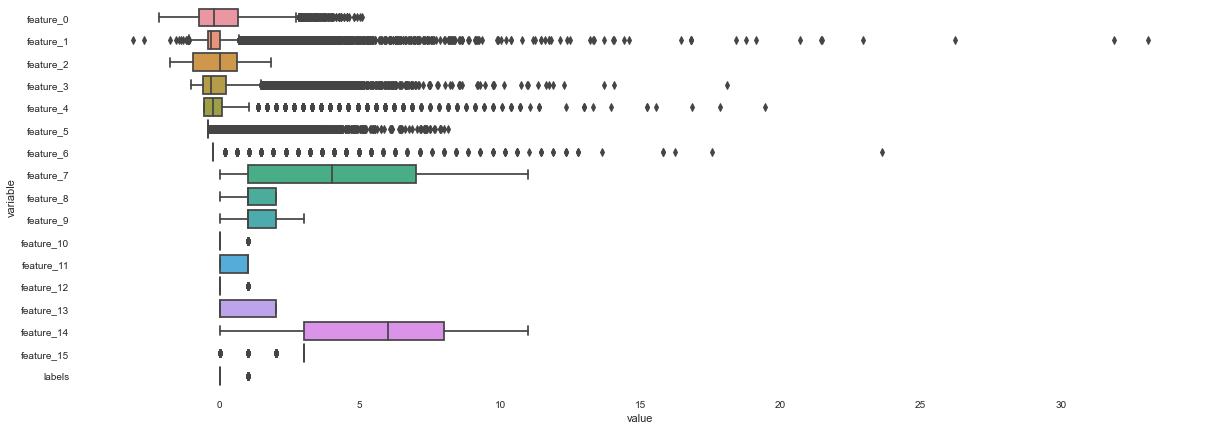

In [13]:
plt.figure(figsize = (20,7))
sns.boxplot(x="value", y="variable", data=pd.melt(insurance));

Interestingly feature_0 through feature_6 have negative values - needs scaling and transformation as it also has high outliers.

## 4. Creating Models - Objective Minimise F1 score <a class="anchor" id="Section4"></a>

### 4.1 Initial Model Building <a class="anchor" id="Section401"></a>

In [11]:
#building a function for identifying the F1 score for re-use
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix


def output(X,y,model):
    print('Being performed for', model)
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0) 
    #splitting to train and test
    print('X_train', X_train.shape)
    print('y_train', y_train.shape)
    print('X_test', X_test.shape)
    print('y-test', y_test.shape)
    
    model = model() #instantiating a classifier model as needed
    
    model.fit(X_train,y_train)  #fitting the model on the training dataset
    
    print('\nPost fitting training data,the hyper parameters used are :\n', 
          model.get_params(deep = True))  #printing out the hyper-parameters
    
    y_pred_train = model.predict(X_train)  #predicting on the training set
    y_pred_test = model.predict(X_test)  #predicting on the training set
    
    print('\nThe classification report on training set is \n', classification_report(y_train,y_pred_train))
    print('The classification report on the test set is \n', classification_report(y_test,y_pred_test))
    
    conf_matrix = pd.DataFrame(confusion_matrix(y_test,y_pred_test))
    
    conf_matrix.index = ['actual will not churn', 'actual will churn']  #adding the actual - rows 
    conf_matrix.columns = ['predicted will not churn', 'predicted will churn']  #adding predicted - columns
    
    print('The confusion matrix representation:\n', conf_matrix)

So now that we have built the function we can test it across multiple classification techniques to identify the best possible model.  We have the following classification techniques at hand:

- Logistic Regression
- Naive Bayes - though it is known to be a bad estimator - but lets give it a try
- Stochastic Gradient Descent
- K Nearest Neighbours
- Decision Tree
- Random Forest Classifier

In [7]:
# starting the process by importing the different classification algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
print('Loading Done!')

Loading Done!


In [8]:
#Splitting Insurance once into X & y for feeding to function
X = insurance.drop('labels', axis = 1)
y = insurance.labels

In [9]:
#starting with Logistic Regression

output(X,y,LogisticRegression)

Being performed for <class 'sklearn.linear_model._logistic.LogisticRegression'>
X_train (27126, 16)
y_train (27126,)
X_test (6782, 16)
y-test (6782,)

Post fitting training data,the hyper parameters used are :
 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 2020, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

The classification report on training set is 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     23941
           1       0.58      0.22      0.32      3185

    accuracy                           0.89     27126
   macro avg       0.74      0.60      0.63     27126
weighted avg       0.87      0.89      0.87     27126

The classification report on the test set is 
               precision    recall  f1-score   support

           0       0.91      0.98  

In [12]:
#Gaussian NB

output(X,y,GaussianNB)

Being performed for <class 'sklearn.naive_bayes.GaussianNB'>
X_train (27126, 16)
y_train (27126,)
X_test (6782, 16)
y-test (6782,)

Post fitting training data,the hyper parameters used are :
 {'priors': None, 'var_smoothing': 1e-09}

The classification report on training set is 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90     23941
           1       0.35      0.47      0.40      3185

    accuracy                           0.83     27126
   macro avg       0.64      0.68      0.65     27126
weighted avg       0.86      0.83      0.84     27126

The classification report on the test set is 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90      6000
           1       0.33      0.46      0.39       782

    accuracy                           0.83      6782
   macro avg       0.63      0.67      0.65      6782
weighted avg       0.86      0.83      0.84      6782

The confusion matr

In [13]:
#SGD Classifier

output(X,y,SGDClassifier)

Being performed for <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
X_train (27126, 16)
y_train (27126,)
X_test (6782, 16)
y-test (6782,)

Post fitting training data,the hyper parameters used are :
 {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

The classification report on training set is 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94     23941
           1       0.52      0.30      0.38      3185

    accuracy                           0.89     27126
   macro avg       0.72      0.63      0.66     27126
weighted avg       0.87      0.89      0.87     27126

The 

In [14]:
#KNearest Neighbors

output(X,y,KNeighborsClassifier)

Being performed for <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
X_train (27126, 16)
y_train (27126,)
X_test (6782, 16)
y-test (6782,)

Post fitting training data,the hyper parameters used are :
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

The classification report on training set is 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     23941
           1       0.76      0.47      0.58      3185

    accuracy                           0.92     27126
   macro avg       0.85      0.73      0.77     27126
weighted avg       0.91      0.92      0.91     27126

The classification report on the test set is 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      6000
           1       0.58      0.34      0.43       782

    accuracy                           0.90      

In [15]:
#Decision Tree Classifier

output(X,y,DecisionTreeClassifier)

Being performed for <class 'sklearn.tree._classes.DecisionTreeClassifier'>
X_train (27126, 16)
y_train (27126,)
X_test (6782, 16)
y-test (6782,)

Post fitting training data,the hyper parameters used are :
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}

The classification report on training set is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23941
           1       1.00      1.00      1.00      3185

    accuracy                           1.00     27126
   macro avg       1.00      1.00      1.00     27126
weighted avg       1.00      1.00      1.00     27126

The classification report on the test set is 
               precision    recall  f1-sc

In [16]:
#Random Forest Classifier

output(X,y,RandomForestClassifier)

Being performed for <class 'sklearn.ensemble._forest.RandomForestClassifier'>
X_train (27126, 16)
y_train (27126,)
X_test (6782, 16)
y-test (6782,)

Post fitting training data,the hyper parameters used are :
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

The classification report on training set is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23941
           1       1.00      1.00      1.00      3185

    accuracy                           1.00     27126
   macro avg       1.00      1.00      1.00     27126
weighted avg       1.00      1.00      1.00     27

___
Evaluating the results:

Since the focus on the modelling techniques was to maximise the F1 score, we will consider the F1 weighted score from the classification report for the sake of simplicity and brevity.

| Classification Algorithm | Weighted F1 Train | Weighted F1 Test |
| --- | --- | --- |
| Logistic Regression | 0.87 | 0.87 |
| Gaussian NB | 0.84 | 0.84 |
| SGD Classifier | 0.87 | 0.87 |
| KNearest Neighbors | 0.91 | 0.88 |
| Decision Tree | 1.00 | 0.88 |
| Random Forest | 1.00 | 0.89 |
___
## Ladies & Gentlemen, girls and boys, the winner is :

(Loud Drumroll)...

# Random Forest Classifier 
(Thunderous Applause and Standing Ovation)

## We will proceed on all the next steps with the winning algorithm. 

## 5. Applying Strategies to Improve Score <a class="anchor" id="Section5"></a>

### 5.1 Applying Standard Scaler <a class="anchor" id="Section501"></a>

In [48]:
#applying standard scaler
#performing Standard Scaler only on the continious variables ommitting the cardinal values - and then joining the dataframe back

from sklearn.preprocessing import StandardScaler
scaled_features = X.copy(deep = True)
cont = ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6']
card = ['feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15']
features = scaled_features[cont]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[cont]=features
scaled_features.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,-0.272422,-0.421012,1.344057,-0.012199,0.076245,1.08786,0.236326,3,0,1,0,0,0,0,10,2
1,0.857936,0.146322,0.503673,-0.976688,-0.566950,-0.40927,-0.304531,4,1,2,0,1,0,0,0,3
2,0.952132,-0.173937,1.824277,-0.701673,0.076245,-0.40927,-0.304531,6,1,2,0,0,0,0,5,3
3,0.857936,-0.378592,0.983892,-0.039313,-0.566950,-0.40927,-0.304531,4,0,2,0,1,0,0,5,3
4,1.328918,1.565628,-1.177096,-0.097415,-0.245352,-0.40927,-0.304531,0,1,1,0,0,0,0,8,3


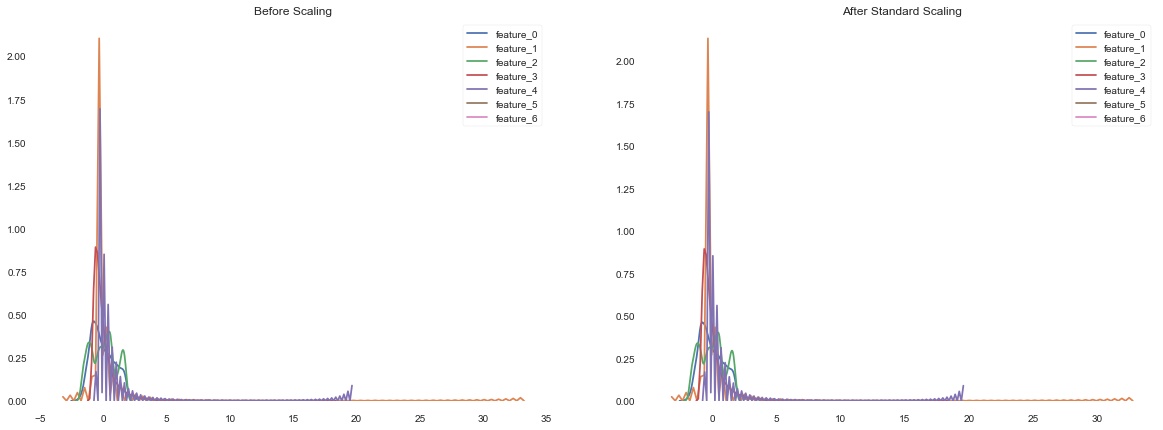

In [49]:
#taking a look at how the data was transformed

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize =(20,7))

ax1.set_title('Before Scaling')
for col in cont:
    sns.kdeplot(X[col], ax =ax1)

ax2.set_title('After Standard Scaling')
for col in cont:
    sns.kdeplot(scaled_features[col], ax = ax2);
    
    
#'(feature_0,)','(feature_1,)','(feature_2,)','(feature_3,)','(feature_4,)','(feature_5,)','(feature_6,)'

Distribution is now centered around 0 with a standard deviation of 1

Clearly the data is already scaled...hence we do not see any change in the data - hence no perceptible change expected in model metrics

Clearly no improvement on the numbers possible as StandardScaler is not the right method.

Further verification of the data reveals the possiblity that the outliers may be affecting the predictions.  Hence, RobustScaler may be a better option considering that it is robust to outliers.

### 5.2 Applying Robust Scaler <a class="anchor" id="Section502"></a>

However, the boxplot as shown earlier has outliers in the case of the continious variables.  It makes it suitable for the consideration of a RobustScaler to see whether there would be an improvement in the F1_scores.

In [17]:
#applying robust scaler

from sklearn.preprocessing import RobustScaler

rob_scaled = X.copy(deep = True)
cont = ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6']
features2 = rob_scaled[cont]
scaler2 = RobustScaler().fit(features2.values)
features2 = scaler2.transform(features2.values)
rob_scaled[cont]=features2
rob_scaled.head()


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,-0.066667,-0.285188,0.846154,0.347222,0.5,1.488101,0.434138,3,0,1,0,0,0,0,10,2
1,0.733333,1.005895,0.307692,-0.805556,-0.5,0.000000,0.000000,4,1,2,0,1,0,0,0,3
2,0.800000,0.277082,1.153846,-0.476852,0.5,0.000000,0.000000,6,1,2,0,0,0,0,5,3
3,0.733333,-0.188651,0.615385,0.314815,-0.5,0.000000,0.000000,4,0,2,0,1,0,0,5,3
4,1.066667,4.235814,-0.769231,0.245370,0.0,0.000000,0.000000,0,1,1,0,0,0,0,8,3


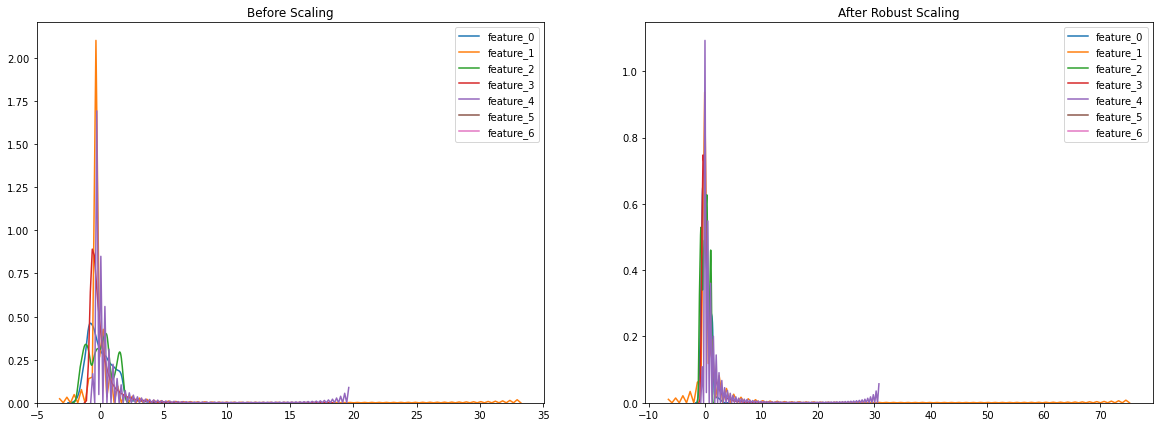

In [18]:
#taking a look at how the data was transformed using RobustSaler

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize =(20,7))

ax1.set_title('Before Scaling')
for col in cont:
    sns.kdeplot(X[col], ax =ax1)

ax2.set_title('After Robust Scaling')
for col in cont:
    sns.kdeplot(rob_scaled[col], ax = ax2);

From the plot above we can see the influence of outliers in the data has been minimised.

In [19]:
#now performing Random forest classifier and checking for improvement in f1 score using RobustScaler

output(rob_scaled,y,RandomForestClassifier)

Being performed for <class 'sklearn.ensemble._forest.RandomForestClassifier'>
X_train (27126, 16)
y_train (27126,)
X_test (6782, 16)
y-test (6782,)

Post fitting training data,the hyper parameters used are :
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

The classification report on training set is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23941
           1       1.00      1.00      1.00      3185

    accuracy                           1.00     27126
   macro avg       1.00      1.00      1.00     27126
weighted avg       1.00      1.00      1.00     27

After performing machine learning algo on the RobustScaled data, there does seem to be a very slight bump in the test results moving up by 0.01.  This may not necessarily translate to an improvement in the model itself.

### 5.3 Applying Normaliser <a class="anchor" id="Section503"></a>

In [20]:
# now applying normaliser

from sklearn.preprocessing import Normalizer

norm = X.copy(deep = True)
cont = ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6']
features3 = norm[cont]
scaler3 = Normalizer().fit(features3.values)
features3 = scaler3.transform(features3.values)
norm[cont]=features3
norm.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,-0.153055,-0.234927,0.744475,-0.006799,0.042194,0.595939,0.100849,3,0,1,0,0,0,0,10,2
1,0.537593,0.095096,0.317358,-0.616701,-0.358585,-0.259139,-0.158676,4,1,2,0,1,0,0,0,3
2,0.424065,-0.077780,0.816869,-0.314768,0.034109,-0.184103,-0.112730,6,1,2,0,0,0,0,5,3
3,0.550769,-0.246101,0.635265,-0.025464,-0.367374,-0.265491,-0.162565,4,0,2,0,1,0,0,5,3
4,0.541810,0.650661,-0.482033,-0.039972,-0.100864,-0.168320,-0.103065,0,1,1,0,0,0,0,8,3


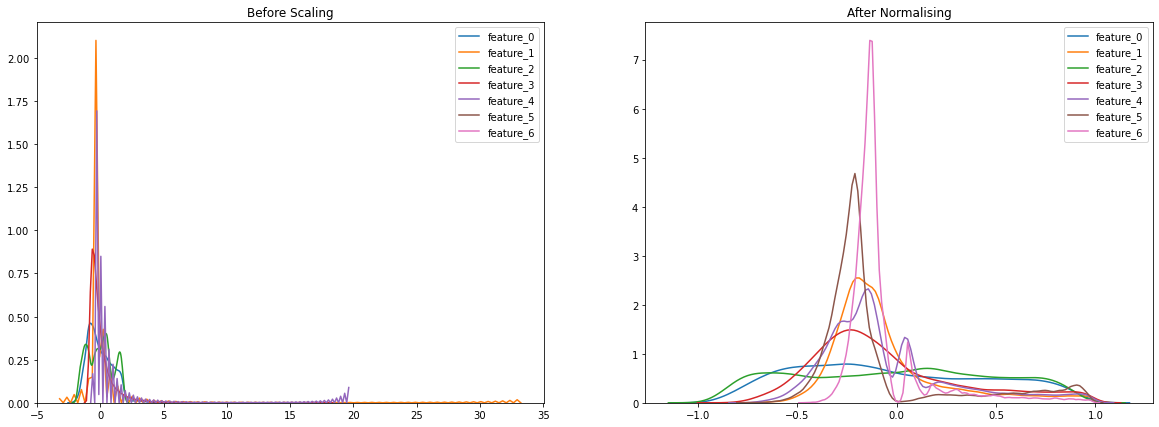

In [21]:
#taking a look at how the data was transformed using Normaliser

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize =(20,7))

ax1.set_title('Before Scaling')
for col in cont:
    sns.kdeplot(X[col], ax =ax1)

ax2.set_title('After Normalising')
for col in cont:
    sns.kdeplot(norm[col], ax = ax2);

In [22]:
#now performing Random forest classifier and checking for improvement in f1 score using Normaliser

output(norm,y,RandomForestClassifier)

Being performed for <class 'sklearn.ensemble._forest.RandomForestClassifier'>
X_train (27126, 16)
y_train (27126,)
X_test (6782, 16)
y-test (6782,)

Post fitting training data,the hyper parameters used are :
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

The classification report on training set is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23941
           1       1.00      1.00      1.00      3185

    accuracy                           1.00     27126
   macro avg       1.00      1.00      1.00     27126
weighted avg       1.00      1.00      1.00     27

Normalising the dataset has also resulted in an improvement of 0.01 in the weighted F1 score.  May be ignored as there is definite overfitting in the case of the training set.

## 6. Establishing importance of features for optimisation <a class="anchor" id="Section6"></a>

### 6.1 Applying PCA <a class="anchor" id="Section601"></a>

In [27]:
#performing feature selection using PCA

from sklearn.decomposition import PCA

pca = PCA(0.95).fit(X)

pca.explained_variance_ratio_

array([0.37851812, 0.29597165, 0.07551277, 0.03985822, 0.03915833,
       0.03425624, 0.03221103, 0.02829613, 0.02056423, 0.01719027])

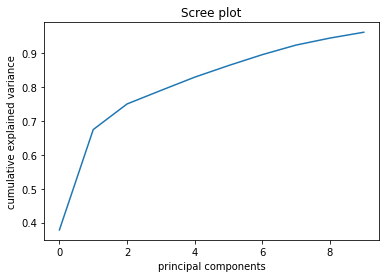

In [28]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principal components')
plt.ylabel('cumulative explained variance')
plt.title('Scree plot');

In [29]:
print('%d components explain 95%% of the variation in data' % pca.n_components_)

10 components explain 95% of the variation in data


In [33]:
#applying pca to the data with the 10 components as identified above

import time

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


X_train_red = pca.fit_transform(X_train)
print('X_train with PCA', X_train_red.shape)
X_test_red = pca.transform(X_test)
print('X_test with PCA', X_test_red.shape)

start_time = time.time()
#instantiating random forest classifier model
rfc_3 = RandomForestClassifier(random_state = 2020)

#fitting
rfc_3.fit(X_train_red,y_train)

#predicting
y_pred = rfc_3.predict(X_test_red)

print('The F1 score for test data with PCA is\n', classification_report(y_test,y_pred))

end_time=time.time()
time1 = end_time - start_time
print('The entire operation with PCA took %s seconds' %time1)

start_time = time.time()
output(X,y,RandomForestClassifier)
end_time = time.time()
time2 = end_time - start_time
print('The entire operation without PCA takes %s seconds ' %time2)

X_train with PCA (27126, 10)
X_test with PCA (6782, 10)
The F1 score for test data with PCA is
               precision    recall  f1-score   support

           0       0.92      0.98      0.94      6000
           1       0.62      0.31      0.41       782

    accuracy                           0.90      6782
   macro avg       0.77      0.64      0.68      6782
weighted avg       0.88      0.90      0.88      6782

The entire operation with PCA took 7.1037445068359375 seconds
Being performed for <class 'sklearn.ensemble._forest.RandomForestClassifier'>
X_train (27126, 16)
y_train (27126,)
X_test (6782, 16)
y-test (6782,)

Post fitting training data,the hyper parameters used are :
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0,

Apparently after running the time module multiple times - it seems that it takes more time to run the algorithm with PCA as compared to without PCA.

### 6.2 Applying Manual Method <a class="anchor" id="Section602"></a>

total features selected are:  5
Threshold set by model: 0.06
Features:  ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_14']


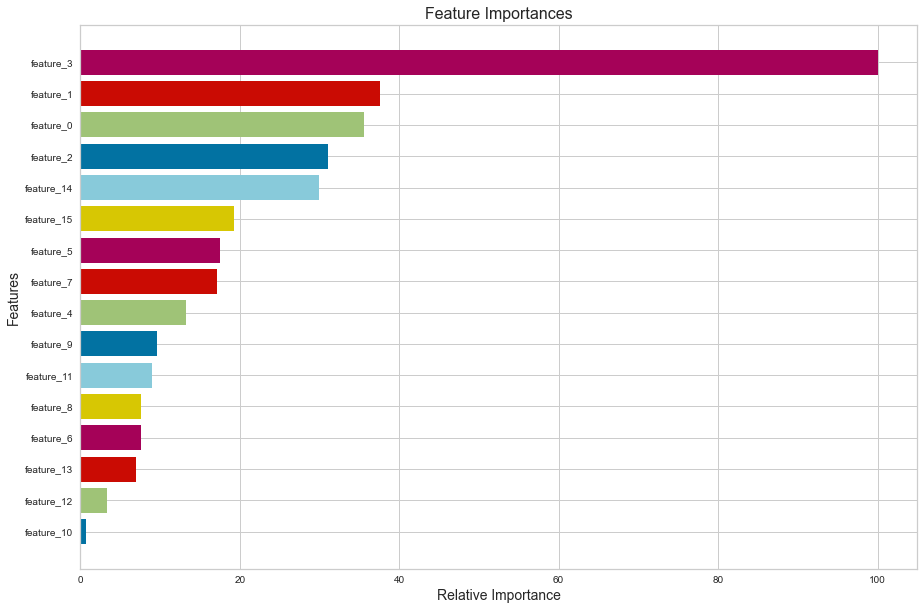

In [38]:
from sklearn.feature_selection import SelectFromModel
#for feature importances
from yellowbrick.model_selection import FeatureImportances

#running selector from model
selector=SelectFromModel(RandomForestClassifier(n_estimators= 500, random_state = 0, n_jobs= -1))
selector.fit(X,y)

#selected features
selected_features = X.columns[(selector.get_support())].tolist()
print('total features selected are: ', len(selected_features))

print('Threshold set by model:', np.round(selector.threshold_, decimals = 2))
print('Features: ', selected_features)


figure = plt.figure(figsize = (15,10))
viz = FeatureImportances(selector.estimator, relative=True)
viz.fit(X,y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title('Feature Importances', size = 16);

Interestingly features3, 1, 0, 2 & 14 have the highest level of importance. 

Hence running RandomForestRegressor on these features to see if it improves the F1 score of the model.

In [39]:
# considering only the top features for X and running the RandomForestRegressor Again.

red_X = X[['feature_3', 'feature_1', 'feature_0', 'feature_2', 'feature_14']]

In [43]:
#splitting the train and test dataset
X_train,X_test,y_train,y_test = train_test_split(red_X,y, test_size = 0.2, random_state = 0)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y-test', y_test.shape)

#instantiating random forest classifier model
start_time = time.time()
rfc_2 = RandomForestClassifier()

#fitting
rfc_2.fit(X_train,y_train)

#predicting
y_pred = rfc_2.predict(X_test)

print('The classification score for test on test set is: \n', classification_report(y_test,y_pred))
end_time = time.time()
time1= end_time - start_time
print('The entire operation with reduced components took %s seconds' %time1)

start_time = time.time()
output(X,y,RandomForestClassifier)
end_time = time.time()
time2 = end_time - start_time
print('The entire operation normally takes %s seconds ' %time2)
time3 = time2 -time1
print('We have a saving of  %s seconds' %time3)

X_train (27126, 5)
y_train (27126,)
X_test (6782, 5)
y-test (6782,)
The classification score for test on test set is: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      6000
           1       0.59      0.35      0.44       782

    accuracy                           0.90      6782
   macro avg       0.75      0.66      0.69      6782
weighted avg       0.88      0.90      0.88      6782

The entire operation with reduced components took 2.6519649028778076 seconds
Being performed for <class 'sklearn.ensemble._forest.RandomForestClassifier'>
X_train (27126, 16)
y_train (27126,)
X_test (6782, 16)
y-test (6782,)

Post fitting training data,the hyper parameters used are :
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_spli

The manual method of dimensionality reduction has resulted in a saving of around .022 seconds, which can be significant when applied over larger scales of data. 

## 7. Performing Cross Validation hyper-parameter tuning <a class="anchor" id="Section7"></a>

In [49]:
#performing K-Fold cross-validation & Hyper Parameter Tuning

from sklearn.model_selection import GridSearchCV

rfc_4 = RandomForestClassifier(random_state=2020)

param_grid = {'n_estimators' : [300,400, 600],
             'max_features' : ['auto', 'sqrt', 'log2'],
             'max_depth' : [9,10,11,12],
             'criterion' : ['gini', 'entropy']}
#instantiating GridsearchCV
CV_rfc = GridSearchCV(estimator=rfc_4, param_grid=param_grid, cv= 50, n_jobs = -1)

#fitting the model
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=50, estimator=RandomForestClassifier(random_state=2020),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300, 400, 600]})

In [50]:
CV_rfc.best_params_

#first run
#{'criterion': 'gini',
# 'max_depth': 8,
# 'max_features': 'auto',
# 'n_estimators': 500}
#second run
#{'criterion': 'gini',
# 'max_depth': 10,
# 'max_features': 'auto',
# 'n_estimators': 400}
#third run
#{'criterion': 'gini',
#'max_depth': 11,
#'max_features': 'auto',
#'n_estimators': 400}

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'auto',
 'n_estimators': 400}

In [51]:
rfc_5 = RandomForestClassifier(random_state= 2020, 
                               criterion='gini', 
                               max_depth=11,
                               max_features='auto',
                               n_estimators = 400)

rfc_5.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, n_estimators=400, random_state=2020)

In [52]:
y_train_pred = rfc_5.predict(X_train)
print('The classification report on training set is: \n', classification_report(y_train,y_train_pred))

y_test_pred = rfc_5.predict(X_test)
print('The Classification report on test set is: \n', classification_report(y_test,y_test_pred))

The classification report on training set is: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     23941
           1       0.91      0.44      0.59      3185

    accuracy                           0.93     27126
   macro avg       0.92      0.72      0.78     27126
weighted avg       0.93      0.93      0.92     27126

The Classification report on test set is: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      6000
           1       0.59      0.28      0.38       782

    accuracy                           0.89      6782
   macro avg       0.75      0.63      0.66      6782
weighted avg       0.88      0.89      0.88      6782



Interestingly hyper parameter tuning with GridSearch has not resulted in a higher score.  But the over-fitting on the train set has reduced.

## 8. Model Evaluation <a class="anchor" id="Section8"></a>

### 8.1 Building the confusion matrix <a class="anchor" id="Section801"></a>

In [53]:
#confusion matrix using the hyper tuned Random Forest Classifier Model

from sklearn.metrics import confusion_matrix

y_pred = rfc_5.predict(X_test)

conf_matrix = pd.DataFrame(confusion_matrix(y_test,y_pred))

conf_matrix.index = ['actual will not churn', 'actual will churn']
conf_matrix.columns = ['predicted will not churn', 'predicted will churn']

print(conf_matrix)

                       predicted will not churn  predicted will churn
actual will not churn                      5850                   150
actual will churn                           563                   219


### 8.2 AUC ROC Curve <a class="anchor" id="Section802"></a>

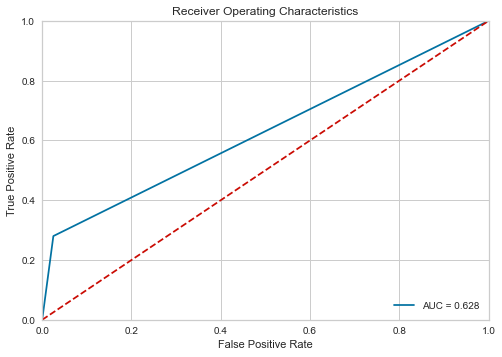

In [54]:
#AUC ROC curve for the hyper tuned Random Forest Classifier Model

from sklearn import metrics

proba_test = rfc_5.predict_proba(X_test)
pred_test = proba_test[:,1]

fpr_test, tpr_test, threshold_test = metrics.roc_curve(y_test, y_pred)
roc_auc_test = metrics.auc(fpr_test, tpr_test)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristics')
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.3f' % roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 9. Fun with AutoML <a class="anchor" id="Section9"></a>

### 9.1 Applying Pycaret <a class="anchor" id="Section901"></a>

In [46]:
#using pyCaret to identify best model for highest F1 score

from pycaret.classification import *

insurance.head()


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [48]:
#first set up the insurance dataset
exp1 = setup(insurance, target = 'labels', n_jobs = -1)

Setup Succesfully Completed!


,Description,Value
0,session_id,344
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(33908, 17)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [54]:
#searching for the best model

best = compare_models(sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.8991,0.9018,0.4328,0.5957,0.4981,0.4440,0.4527,0.1164
1,Linear Discriminant Analysis,0.8978,0.8951,0.4200,0.5905,0.4888,0.4340,0.4429,0.0223
2,CatBoost Classifier,0.9020,0.9166,0.4020,0.6341,0.4886,0.4377,0.4534,15.0104
3,Light Gradient Boosting Machine,0.8993,0.9076,0.4004,0.6047,0.4803,0.4273,0.4392,0.1221
4,Gradient Boosting Classifier,0.9014,0.9142,0.3786,0.6308,0.4714,0.4210,0.4386,0.6096
5,Ada Boost Classifier,0.8968,0.8927,0.3643,0.5961,0.4489,0.3963,0.4123,0.1914
6,Logistic Regression,0.9001,0.8935,0.3390,0.6411,0.4408,0.3920,0.4173,0.0400
7,Naive Bayes,0.8285,0.8023,0.5513,0.3712,0.4349,0.3429,0.3563,0.0036
8,Decision Tree Classifier,0.8620,0.6670,0.4125,0.4106,0.4104,0.3324,0.3331,0.0292
9,Extra Trees Classifier,0.8963,0.8840,0.2919,0.6232,0.3951,0.3469,0.3779,0.1422


Interestingly, Pycaret mentions that the best model for this dataset is extreme gradient boosting.  So going ahead and preparing model from the same.  However, the F1 score remains in the region of 0.5 as with the RandomForestClassifier model.

In [55]:
#creating the extreme gradient boosting model on Gpu
XGB = create_model('xgboost', tree_method = 'gpu_hist', gpu_id = 0)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8926,0.9162,0.4909,0.5400,0.5143,0.4541,0.4547
1,0.8884,0.8740,0.4107,0.5349,0.4646,0.4036,0.4080
2,0.9011,0.9115,0.4107,0.6216,0.4946,0.4423,0.4540
3,0.8695,0.8817,0.3750,0.4375,0.4038,0.3310,0.3323
4,0.9032,0.9063,0.4464,0.6250,0.5208,0.4686,0.4768
5,0.8905,0.9002,0.3393,0.5588,0.4222,0.3657,0.3796
6,0.9030,0.9122,0.3636,0.6452,0.4651,0.4163,0.4370
7,0.8903,0.9257,0.4000,0.5366,0.4583,0.3987,0.4041
8,0.8966,0.9074,0.4545,0.5682,0.5051,0.4481,0.4516
9,0.9093,0.8976,0.3818,0.7000,0.4941,0.4490,0.4740


In [56]:
print(XGB)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=344, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=0)


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=344, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=0), plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:model type detected: type 2
INFO:lo

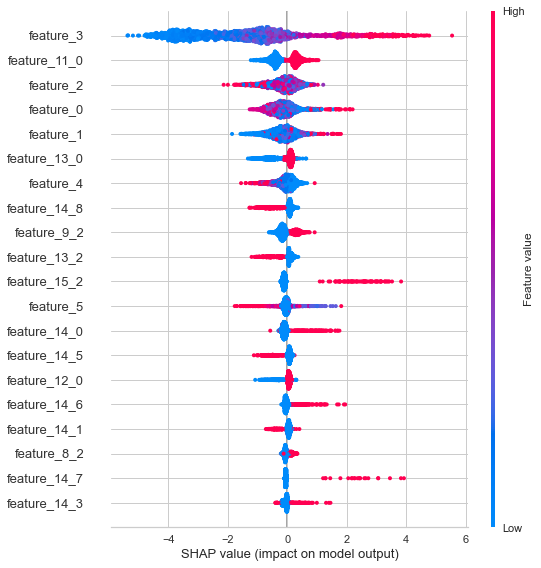

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [68]:
interpret_model(XGB)

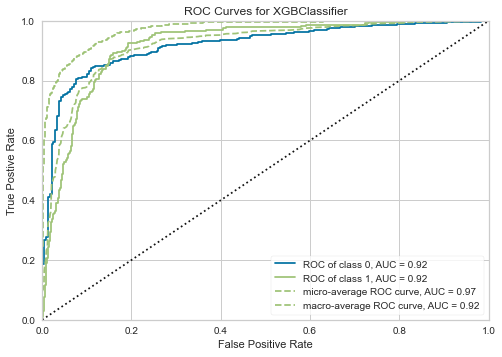

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [65]:
#tuning the extreme gradient boost model
#tuned_XGB = tune_model(XGB)

plot_model(XGB)

Extreme Gradient Boost Model has provided much higher ROC and larger AUC.

### 9.2 Applying Topt <a class="anchor" id="Section902"></a>

In [56]:
#using Tpot classifier

from tpot import TPOTClassifier

# For the Tpot classifier to work the Target Variable has to be called class. Hence renaming the TV column
insurance_tpot = insurance.copy(deep = True)

insurance_tpot.rename(columns ={'labels' : 'class'}, inplace = True)
insurance_tpot.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,class
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [57]:
#splitting the data

X = insurance_tpot.loc[:, insurance_tpot.columns != 'class']
y = insurance_tpot['class']

X.shape , y.shape

((33908, 16), (33908,))

In [58]:

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=2021)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((27126, 16), (27126,), (6782, 16), (6782,))

In [59]:
#optimising for f1 score
tpot = TPOTClassifier(scoring = 'f1', verbosity= 2, max_time_mins= 2, max_eval_time_mins= 5, 
                      population_size=40,n_jobs = -1)
tpot.fit(X_train,y_train)


Generation 1 - Current best internal CV score: 0.5459921803775212
2.91 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: DecisionTreeClassifier(GaussianNB(DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=10, min_samples_leaf=9, min_samples_split=17)), criterion=gini, max_depth=1, min_samples_leaf=14, min_samples_split=3)


TPOTClassifier(log_file=<ipykernel.iostream.OutStream object at 0x0000014A91C34FC8>,
               max_time_mins=2, n_jobs=-1, population_size=40, scoring='f1',
               verbosity=2)

In [63]:
print(tpot.score(X_test,y_test))

y_train_pred = tpot.predict(X_train)
print('The Classification Report on the training data is : \n', classification_report(y_train_pred,y_train))

y_test_pred = tpot.predict(X_test)
print('The Classification Report on the test data is :\n', classification_report(y_test,y_test_pred))

0.5598705501618123
The Classification Report on the training data is : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     23068
           1       0.76      0.59      0.66      4058

    accuracy                           0.91     27126
   macro avg       0.84      0.78      0.81     27126
weighted avg       0.90      0.91      0.91     27126

The Classification Report on the test data is :
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5972
           1       0.50      0.64      0.56       810

    accuracy                           0.88      6782
   macro avg       0.72      0.78      0.75      6782
weighted avg       0.90      0.88      0.89      6782



Tpot has been able to give a better F1 score using Gaussian NB, with the test data set getting an F1 score of near .6

## 10. Conclusion and way forward <a class="anchor" id="Section10"></a>

It was extremely exciting working on this real world project from Kaggle. I was able to apply my learning across multiple parameters and identify what would possibly be currently the best model for this.

Though spending more time on the model itself and additional computing power would definitely help yield a more hyper-tuned model.

___

<div style="text-align: right"> Thank you. 
    Arijit Chakrabarti,
    March 2020 Cohort </div>